## TP AI SEMINAR 
# Etudiant : FADJI OHOUKOH

Gradient masking is a phenomenon where the gradients of a model's output with respect to its input become uninformative. This can happen when a model is trained with adversarial training and the model learns to "hide" its gradients to resist adversarial attacks.

In the provided code, the model is trained using adversarial examples generated by the Projected Gradient Descent (PGD) attack. This is a form of adversarial training intended to increase the model's robustness against adversarial attacks.

If the model is robust against the PGD attack after this training, it might be due to the model learning to mask its gradients. However, gradient masking can make the model appear more robust than it actually is, because the model might still be vulnerable to other types of attacks that don't rely on gradients.

To check for gradient masking, you could try attacking the model with a black-box attack (an attack that doesn't have access to the model's gradients). If the model is still robust against the black-box attack, it's less likely that the model's robustness is due to gradient masking.

In conclusion, while adversarial training can increase a model's robustness, it's important to be aware of the potential for gradient masking and to test the model's robustness with a variety of attack methods.

If your model is robust against the Simultaneous Perturbation Stochastic Approximation (SPSA) attack, it suggests that the model is not relying on gradient masking for its robustness.

The SPSA attack is a type of black-box attack that does not require access to the model's gradients. Instead, it estimates the gradient by perturbing the input in random directions. Therefore, if a model is robust against the SPSA attack, it's less likely that the model's robustness is due to gradient masking.

Gradient masking is a phenomenon where a model hides its gradients to resist adversarial attacks. This can make the model appear more robust than it actually is, because the model might still be vulnerable to black-box attacks that don't rely on gradients.

In conclusion, if your model is robust against the SPSA attack, it's a good sign that the model's robustness is not due to gradient masking. However, you should still test the model against other types of adversarial attacks to get a more complete understanding of its robustness.

In [1]:
from torchvision import datasets, transforms

# Define a transform to convert images to PyTorch tensors
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Load the MNIST dataset
data = mnist.data
target = mnist.targets  # Use mnist.targets instead of mnist.target
#Defining the training set 
X_train=data
y_train=target
#Defining the test set 
mnist1=datasets.MNIST(root='./data',train=False,transform=transform , download=True)
X_test=mnist1.data
y_test=mnist1.targets
# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: torch.Size([60000, 28, 28])
Shape of X_test: torch.Size([10000, 28, 28])
Shape of y_train: torch.Size([60000])
Shape of y_test: torch.Size([10000])


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import  transforms
# Define the model architecture
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, bias=False)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, bias=False)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 5 * 5, 10)  # Fully connected layer
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)  # Apply fully connected layer
        return x

# Create an instance of the model
model = ConvNet()



**If the classification task involved only two labels, what could have been the final layer ?**

If the classification task involved only two labels, the final layer could be a fully connected layer with only one output neuron. This output neuron would output the raw score (logit) for one of the classes. The score for the other class would be the negation of this score. 

To convert these raw scores into probabilities, you could apply a sigmoid activation function to the output of the final layer. The sigmoid function would map the raw score to a probability between 0 and 1. The probability for the other class would be `1 - p`, where `p` is the output of the sigmoid function.

**The Final Layer is then :**
**self.fc = nn.Linear(64 * 5 * 5, 1)**


**What is the appropriate loss for such a task ?**

If the classification task involved only two labels, the final layer of the model could have been a single neuron with a sigmoid activation function. This would output a value between 0 and 1, representing the probability of the input belonging to one of the two classes.

The loss function that could have been used in this case is the binary cross-entropy loss. This loss function is commonly used for binary classification tasks and is suitable when the output of the model is a probability value. It measures the dissimilarity between the predicted probabilities and the true labels, encouraging the model to correctly classify the inputs.

**In this case with MNIST dataset the loss is :** 

In [3]:
import torch.nn as nn

# Define the loss function
criterion = nn.CrossEntropyLoss()


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
Loss =[]
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the batch size
batch_size = 150

# Assuming X_train is your input data and y_train are your labels
X_train_reshaped = X_train.unsqueeze(1).to(torch.float32)
y_train = y_train.to(torch.long)

# Create a DataLoader for the training set
train_dataset = TensorDataset(X_train_reshaped, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


In [17]:
from torch.optim.lr_scheduler import StepLR

model = ConvNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
epsilon = 0.3
alpha = 0.01
k = 40
Q = [0, 1]  # Assuming pixel values are in the range [0, 1]
num_epochs = 30  # Increase the number of epochs
best_val_acc = 0  # For early stopping
total_predictions =0
total_correct=0
model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Perform the l∞ PGD attack
        inputs_adv = inputs.data + epsilon * (2 * torch.rand_like(inputs) - 1)
        inputs_adv.requires_grad = True

        for _ in range(k):
            outputs_adv = model(inputs_adv)
            loss_adv = criterion(outputs_adv, labels)
            loss_adv.backward()

            inputs_adv_grad = alpha * torch.sign(inputs_adv.grad.data)
            inputs_adv = inputs_adv.detach() + inputs_adv_grad
            inputs_adv = torch.min(torch.max(inputs_adv, inputs - epsilon), inputs + epsilon)
            inputs_adv = torch.clamp(inputs_adv, Q[0], Q[1])  # Clip to valid pixel range
            inputs_adv.requires_grad = True

        # Update the model
        outputs = model(inputs_adv)
        loss = criterion(outputs, labels)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Loss: {loss.item()}")

    # Decay learning rate
    scheduler.step()

    # Early stopping
    #val_acc = evaluate(model, data_loader)  # You need to implement the evaluate function
    #if val_acc > best_val_acc:
    #    best_val_acc = val_acc
    #else:
    #    print("Early stopping")
    #    break

# Calculate and print the accuracy for the total training set
total_accuracy = total_correct / total_predictions * 100
print(f"Total training accuracy: {total_accuracy}%")

print('Finished Adversarial Training')

Epoch 1/30, Batch 100/469, Loss: 1.1193376779556274
Epoch 1/30, Batch 200/469, Loss: 1.0016257762908936
Epoch 1/30, Batch 300/469, Loss: 1.0378323793411255
Epoch 1/30, Batch 400/469, Loss: 0.6342997550964355
Epoch 2/30, Batch 100/469, Loss: 0.7441186904907227
Epoch 2/30, Batch 200/469, Loss: 0.6542978286743164
Epoch 2/30, Batch 300/469, Loss: 0.7110703587532043
Epoch 2/30, Batch 400/469, Loss: 0.8739500045776367
Epoch 3/30, Batch 100/469, Loss: 0.8111435174942017
Epoch 3/30, Batch 200/469, Loss: 0.9678577780723572
Epoch 3/30, Batch 300/469, Loss: 0.6420261263847351
Epoch 3/30, Batch 400/469, Loss: 0.6751646399497986
Epoch 4/30, Batch 100/469, Loss: 0.8636491894721985
Epoch 4/30, Batch 200/469, Loss: 0.7395945191383362
Epoch 4/30, Batch 300/469, Loss: 0.7308686971664429
Epoch 4/30, Batch 400/469, Loss: 0.7376294136047363
Epoch 5/30, Batch 100/469, Loss: 0.7519114017486572
Epoch 5/30, Batch 200/469, Loss: 0.9448932409286499
Epoch 5/30, Batch 300/469, Loss: 0.8007273077964783
Epoch 5/30, 

In [15]:
import torch
from torch.optim.lr_scheduler import StepLR
from torch.nn import CrossEntropyLoss


model = ConvNet()
criterion = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-2)  # L2 regularization
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
epsilon = 0.3
alpha = 0.01
k = 40
Q = [0, 1]  # Assuming pixel values are in the range [0, 1]
num_epochs = 10  # Increase the number of epochs
best_val_acc = 0  # For early stopping
total_predictions =0
total_correct=0
model.train()

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Perform the l∞ PGD attack
        inputs_adv = inputs.data + epsilon * (2 * torch.rand_like(inputs) - 1)
        inputs_adv.requires_grad = True

        for _ in range(k):
            outputs_adv = model(inputs_adv)
            loss_adv = criterion(outputs_adv, labels)
            loss_adv.backward()
            inputs_adv_grad = alpha * torch.sign(inputs_adv.grad.data)
            inputs_adv = inputs_adv.detach() + inputs_adv_grad
            inputs_adv = torch.min(torch.max(inputs_adv, inputs - epsilon), inputs + epsilon)
            inputs_adv = torch.clamp(inputs_adv, Q[0], Q[1])  # Clip to valid pixel range
            inputs_adv.requires_grad = True

        # Update the model
        outputs = model(inputs_adv)
        loss = criterion(outputs, labels)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Loss: {loss.item()}")

    # Decay learning rate
    scheduler.step()

    # Early stopping
    #val_acc = evaluate(model, data_loader)  # You need to implement the evaluate function
    #if val_acc > best_val_acc:
    #    best_val_acc = val_acc
    #else:
    #    print("Early stopping")
    #    break

# Calculate and print the accuracy for the total training set
total_accuracy = total_correct / total_predictions * 100
print(f"Total training accuracy: {total_accuracy}%")

print('Finished Adversarial Training')

Epoch 1/10, Batch 100/400, Loss: 0.47082167863845825
Epoch 1/10, Batch 200/400, Loss: 0.45452234148979187
Epoch 1/10, Batch 300/400, Loss: 0.43671560287475586
Epoch 1/10, Batch 400/400, Loss: 0.338225394487381
Epoch 2/10, Batch 100/400, Loss: 0.457643985748291
Epoch 2/10, Batch 200/400, Loss: 0.39153602719306946
Epoch 2/10, Batch 300/400, Loss: 0.47138741612434387
Epoch 2/10, Batch 400/400, Loss: 0.36806347966194153
Epoch 3/10, Batch 100/400, Loss: 0.4652268588542938
Epoch 3/10, Batch 200/400, Loss: 0.3167855441570282
Epoch 3/10, Batch 300/400, Loss: 0.45955267548561096
Epoch 3/10, Batch 400/400, Loss: 0.47829151153564453
Epoch 4/10, Batch 100/400, Loss: 0.35956454277038574
Epoch 4/10, Batch 200/400, Loss: 0.346874862909317
Epoch 4/10, Batch 300/400, Loss: 0.43387624621391296
Epoch 4/10, Batch 400/400, Loss: 0.28161752223968506
Epoch 5/10, Batch 100/400, Loss: 0.29040566086769104
Epoch 5/10, Batch 200/400, Loss: 0.44219374656677246
Epoch 5/10, Batch 300/400, Loss: 0.3155958354473114
Ep

In [45]:
# Assuming X_test is your input test data and y_test are your test labels
X_test_reshaped = X_test.unsqueeze(1).to(torch.float32)
y_test = y_test.to(torch.long)

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_reshaped, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

# Switch the model to evaluation mode
model.eval()

total_correct = 0
total_predictions = 0

# No need to track gradients for test data, so we use torch.no_grad()
with torch.no_grad():
    for inputs, labels in test_loader:
        # Perform the l∞ PGD attack
        inputs_adv = inputs.data + epsilon * (2 * torch.rand_like(inputs) - 1)
        #inputs_adv.requires_grad = True

        for _ in range(k):
            outputs_adv = model(inputs_adv)
            loss_adv = criterion(outputs_adv, labels)
            #loss_adv.backward()

            inputs_adv_grad = alpha * torch.sign(inputs_adv)
            inputs_adv = inputs_adv.detach() + inputs_adv_grad
            inputs_adv = torch.min(torch.max(inputs_adv, inputs - epsilon), inputs + epsilon)
            inputs_adv = torch.clamp(inputs_adv, Q[0], Q[1])  # Clip to valid pixel range
            inputs_adv.requires_grad = True

        # Forward pass
        outputs = model(inputs_adv)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        total_correct += (predicted == labels).sum().item()

# Calculate and print the accuracy for the total test set
total_accuracy = total_correct / total_predictions * 100
print(f"Total test accuracy: {total_accuracy}%")

Total test accuracy: 95.86%


In [49]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to calculate gradients
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on clean test images: %d %%' % (100 * correct / total))

Accuracy of the model on clean test images: 95 %


In [50]:
scripted_model = torch.jit.script(model)
scripted_model.save("D:\Master_2022-2024\M2\AI_SEMINAR\Rendu_Project\True_Model_PGD")

In [ ]:
# 1. Train model with adversarial examples
# (WE've already done this with the PGD attack)

# 2. Evaluate with AutoAttack
from autoattack import AutoAttack
aa = AutoAttack(model, norm='Linf')
inputs_adv = aa.run_standard_evaluation(inputs, labels)

# 3. Evaluate with SPSA attack
from cleverhans.future.torch.attacks import spsa
inputs_adv = spsa(model, inputs, labels)

# 4. Evaluate with transferred adversarial examples
# (Assume `other_model` is the model you're transferring examples from)
inputs_adv = pgd_attack(other_model, inputs, labels)
outputs_adv = model(inputs_adv)

# 5. Check for gradient masking
# (Compare performance against white-box and black-box attacks)

# 6. Consider adaptive adversaries
# (Incorporate knowledge of your defense into the attack process)

In [ ]:
# 1. Training model with adversarial examples
# (We've already done this with the PGD attack)

# 2. Evaluate with AutoAttack
from autoattack import AutoAttack
aa = AutoAttack(model, norm='Linf')
inputs_adv = aa.run_standard_evaluation(inputs, labels)

# Evaluate the model on the adversarial examples
outputs_adv = model(inputs_adv)
_, predicted = torch.max(outputs_adv.data, 1)
total_predictions = labels.size(0)
total_correct = (predicted == labels).sum().item()
total_accuracy = total_correct / total_predictions * 100
print(f"Total accuracy on AutoAttack adversarial examples: {total_accuracy}%")

# 3. Evaluate with SPSA attack
from cleverhans.future.torch.attacks import spsa
inputs_adv = spsa(model, inputs, labels)

# Evaluate the model on the adversarial examples
outputs_adv = model(inputs_adv)
_, predicted = torch.max(outputs_adv.data, 1)
total_predictions = labels.size(0)
total_correct = (predicted == labels).sum().item()
total_accuracy = total_correct / total_predictions * 100
print(f"Total accuracy on SPSA adversarial examples: {total_accuracy}%")

# 4. Evaluate with transferred adversarial examples
# (Assume `other_model` is the model you're transferring examples from and `pgd_attack` is a function that generates adversarial examples using the PGD attack)
inputs_adv = pgd_attack(other_model, inputs, labels)
outputs_adv = model(inputs_adv)

# Evaluate the model on the adversarial examples
_, predicted = torch.max(outputs_adv.data, 1)
total_predictions = labels.size(0)
total_correct = (predicted == labels).sum().item()
total_accuracy = total_correct / total_predictions * 100
print(f"Total accuracy on transferred adversarial examples: {total_accuracy}%")

# 5. Check for gradient masking
# (Compare performance against white-box and black-box attacks)

# 6. Consider adaptive adversaries
# (Incorporate knowledge of your defense into the attack process)

In [ ]:
import torch
import numpy as np

def spsa_attack(model, x, y,loss, epsilon, alpha, delta, num_steps):
    x_adv = x.clone().detach().requires_grad_(True).to(x.device)
    target = y.clone().detach().to(x.device)

    for i in range(num_steps):
        # Sample random directions
        v = torch.randn_like(x_adv)

        # Calculate the gradient estimate
        x_plus_delta = x_adv + delta * v
        x_minus_delta = x_adv - delta * v
        y_plus_delta = model(x_plus_delta)
        y_minus_delta = model(x_minus_delta)
        loss_plus_delta = loss(y_plus_delta, target)
        loss_minus_delta = loss(y_minus_delta, target)
        grad_estimate = (loss_plus_delta - loss_minus_delta) / (2 * delta) * v

        # Update the adversarial example
        x_adv = x_adv - alpha * grad_estimate

        # Project the perturbation to the epsilon ball (Linf norm)
        perturbation = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = x + perturbation

    return x_adv

**Data processing**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
Loss =[]
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the batch size
batch_size = 128

# Assuming X_train is your input data and y_train are your labels
X_train_reshaped = X_train.unsqueeze(1).to(torch.float32)
y_train = y_train.to(torch.long)

# Create a DataLoader for the training set
train_dataset = TensorDataset(X_train_reshaped, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


# Train the model
num_epochs = 10
total_correct = 0
total_predictions = 0
for epoch in range(num_epochs):
    for batch_idx, (Data, Target) in enumerate(train_loader):
        Data = Data.view(Data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
        Data = Data.to(torch.float32)
        Target = Target.view(-1)
        Target = Target.to(torch.long)
        
        # Forward pass
        output = model(Data)
        loss = criterion(output, Target)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += Target.size(0)
        total_correct += (predicted == Target).sum().item()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print the loss for every 100 batches
        if (batch_idx+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item()}")
            Loss.append(loss.item())        

# Calculate and print the accuracy for the total training set
total_accuracy = total_correct / total_predictions * 100
print(f"Total training accuracy: {total_accuracy}%")

Epoch 1/10, Batch 100/469, Loss: 0.08230051398277283
Epoch 1/10, Batch 200/469, Loss: 0.10466738045215607
Epoch 1/10, Batch 300/469, Loss: 0.07740288227796555
Epoch 1/10, Batch 400/469, Loss: 0.05437948554754257
Epoch 2/10, Batch 100/469, Loss: 0.1983824074268341
Epoch 2/10, Batch 200/469, Loss: 0.043125610798597336
Epoch 2/10, Batch 300/469, Loss: 0.028774918988347054
Epoch 2/10, Batch 400/469, Loss: 0.04032076150178909
Epoch 3/10, Batch 100/469, Loss: 0.06667406111955643
Epoch 3/10, Batch 200/469, Loss: 0.05748917907476425
Epoch 3/10, Batch 300/469, Loss: 0.05182642117142677
Epoch 3/10, Batch 400/469, Loss: 0.07583464682102203
Epoch 4/10, Batch 100/469, Loss: 0.03309532627463341
Epoch 4/10, Batch 200/469, Loss: 0.013451998122036457
Epoch 4/10, Batch 300/469, Loss: 0.02285061404109001
Epoch 4/10, Batch 400/469, Loss: 0.019813282415270805
Epoch 5/10, Batch 100/469, Loss: 0.031098512932658195
Epoch 5/10, Batch 200/469, Loss: 0.02879437431693077
Epoch 5/10, Batch 300/469, Loss: 0.0155476

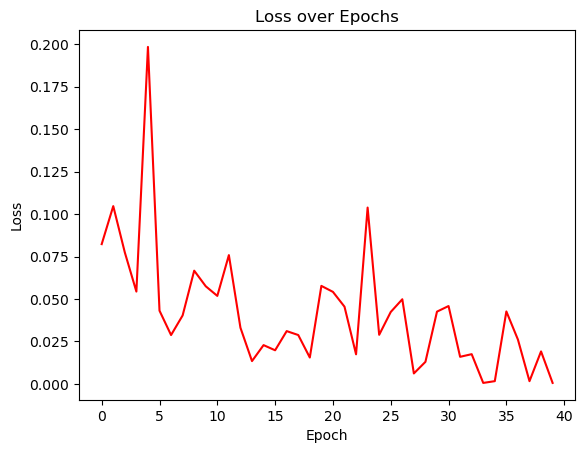

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
# Plot the loss values
plt.plot(Loss,color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


**a-)What is overfitting ?**

Overfitting refers to a situation in machine learning where a model becomes too specialized to the training data and fails to generalize well to new, unseen data. It occurs when a model learns the noise or random fluctuations in the training data instead of the underlying patterns or relationships. As a result, the model may perform very well on the training data but performs poorly on new data.


Overfitting can be caused by having a model with too many parameters relative to the amount of training data available. This can lead to the model memorizing the training examples instead of learning the underlying patterns. Other factors that can contribute to overfitting include using a complex model that is prone to overfitting, training the model for too many epochs, or having a training dataset that is not representative of the population.

 



**b-)What does indicate overfitting ?**

In this study the loss is low for each Epoch . This can potentially indicate overfitting since the training accuracy is 99.28833333333333%. 
We have to then check if our  model generalized well for unseen data by evaluating it on the Test dataset.

Overfitting occurs when a model becomes too specialized to the training data and fails to generalize well to new, unseen data. This can result in the model memorizing the training examples and producing perfect predictions on them, but performing poorly on new data.

Overfitting in a machine learning model can be indicated by several signs:

1. **High Training Accuracy but Low Validation/Test Accuracy**: This is one of the most common signs of overfitting. The model performs exceptionally well on the training data but poorly on unseen data (validation or test set).

2. **Complex Model**: If the model is overly complex (e.g., has too many layers or parameters), it might be able to perfectly fit the training data but fail to generalize to new data.

3. **No Improvement or Deterioration on New Data**: If the model's performance doesn't improve or even gets worse when exposed to new data, it might be overfitting.

4. **High Variance in Model Performance**: If the model's performance varies significantly with different subsets of the training data, it might be overfitting.

5. **Learning Curves**: Plotting learning curves (model's performance on both the training and validation set over time) can also indicate overfitting. If the model continues to improve on the training set over time but deteriorates on the validation set, it's likely overfitting.

To confirm overfitting, we can use techniques like cross-validation. If the model performs well on the training set but poorly during cross-validation, it's likely overfitting.



**c-) Do you know how to reduce overfitting ?**

1. **Get More Data**: More training data can help the model generalize better. The additional data can help the model learn more diverse patterns and reduce its reliance on specific features of the training data.

2. **Data Augmentation**: This involves creating new training samples by applying transformations to the existing data. For example, in image data, you can apply rotations, scaling, translations, and flips.

3. **Simplify the Model**: If the model is too complex (e.g., has too many layers or parameters), it may be prone to overfitting. We can reduce the complexity of the model by removing layers or reducing the number of neurons in the layers.

4. **Regularization**: Techniques like L1 and L2 regularization add a penalty to the loss function for large weights, discouraging the model from relying too heavily on any single feature.

5. **Dropout**: This is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly, which helps to prevent overfitting.

6. **Early Stopping**: During the training process, we can monitor the model's performance on a validation set. If the performance on the validation set starts to degrade (i.e., validation error starts to increase), we can stop the training process. This prevents the model from learning too much from the training data and overfitting.

7. **Use Validation Set**: Always have a validation set to check our model's performance on unseen data during the training process. This can help detect overfitting early on.

8. **Ensemble Methods**: Techniques like bagging and boosting can help to reduce overfitting by combining the predictions of several models.



## 2 Model evaluating

The appropriate metric for evaluating a model on the MNIST test set is **Accuracy**. Accuracy measures the percentage of correctly classified instances out of the total number of instances in the test set. Since MNIST is a classification task where each image represents a digit from 0 to 9, accuracy provides a straightforward and intuitive measure of how well the model is able to classify the digits correctly.

In [ ]:

X_test_reshaped = X_test.unsqueeze(1).to(torch.float32)
y_test = y_test.to(torch.long)

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_reshaped, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Switch the model to evaluation mode
model.eval()

# Initialize counters
total_correct = 0
total_predictions = 0

# No need to track gradients for validation, saves memory and computations
with torch.no_grad():
    for Data, Target in test_loader:
        Data = Data.view(Data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
        Data = Data.to(torch.float32)
        Target = Target.view(-1)
        Target = Target.to(torch.long)
        
        # Forward pass
        output = model(Data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += Target.size(0)
        total_correct += (predicted == Target).sum().item()

# Calculate and print the accuracy for the test set
test_accuracy = total_correct / total_predictions * 100
print(f"Test accuracy: {test_accuracy}%")

Test accuracy: 98.57000000000001%


## 3 Implementation Implement the FGSM attack for the l∞ and l2 norms

The most commonly used loss function for adversarial attacks like FGSM is the Cross-Entropy Loss. This is because it is the standard loss function for classification tasks, and adversarial attacks are typically applied in the context of classification.

Cross-Entropy Loss measures the dissimilarity between the predicted probability distribution and the true distribution. In the context of adversarial attacks, it encourages the model to output a probability distribution that is as far from the true distribution as possible.





In [ ]:
criterion = nn.CrossEntropyLoss()



Another possible loss function we could use is the Mean Squared Error (MSE) Loss. This is typically used for regression tasks, but it can also be used in the context of adversarial attacks. The MSE Loss measures the average squared difference between the predicted and true values. In the context of adversarial attacks, it encourages the model to output values that are as far from the true values as possible.





another_criterion = nn.MSELoss()

The main purpose of the Fast Gradient Sign Method (FGSM) attack is to generate adversarial examples to evaluate the robustness of machine learning models, particularly neural networks. Adversarial examples are input data samples that have been intentionally perturbed to cause a model to misclassify them. The FGSM attack is a specific technique used for crafting these adversarial examples quickly.

## FGSM attack With  norm $l_{\infty}$

In [ ]:
X_train_reshaped = X_train.unsqueeze(1).to(torch.float32)
y_train = y_train.to(torch.long)

# Create a DataLoader for the training set
train_dataset = TensorDataset(X_train_reshaped, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define the FGSM attack function
def fgsm_attack(model, data, target, epsilon):
    data.requires_grad = True
    output = model(data)
    loss = criterion(output, target)
    model.zero_grad()
    loss.backward()
    data_grad = data.grad.data
    perturbed_data = data + epsilon * torch.sign(data_grad)
    perturbed_data = torch.clamp(perturbed_data, 0, 1)
    return perturbed_data

# Set the epsilon value for the FGSM attack
epsilon = 0.1

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in train_loader:  # Use your original data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack(model, data, target, epsilon)
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_train_accuray: {perturbed_accuracy}%")

FGSM_attack_train_accuray: 71.51166666666666%


## FGSM attack on the test set 

In [ ]:
X_test_reshaped = X_test.unsqueeze(1).to(torch.float32)
y_test = y_test.to(torch.long)

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_reshaped, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in test_loader:  # Use your test data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack(model, data, target, epsilon)
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_test_accuracy: {perturbed_accuracy}%")

FGSM_attack_test_accuracy: 71.6%


 ## FGSM attack With  norm $l_{2}$

In [ ]:
def fgsm_attack_g(model, loss_fn, input_image, target_label, epsilon, norm='l_inf'):
    input_image.requires_grad = True
    model.eval()
    
    output = model(input_image)
    loss = loss_fn(output, target_label)
    
    model.zero_grad()
    loss.backward()
    
    if norm == 'l_inf':
        perturbed_image = input_image + epsilon * input_image.grad.sign()
        perturbed_image = torch.clamp(perturbed_image, 0, 1)
    elif norm == 'l2':
        perturbation = epsilon * input_image.grad / input_image.grad.norm(2)
        perturbed_image = input_image + perturbation
        perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    return perturbed_image


X_train_reshaped = X_train.unsqueeze(1).to(torch.float32)
y_train = y_train.to(torch.long)

# Create a DataLoader for the training set
train_dataset = TensorDataset(X_train_reshaped, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)



# Set the epsilon value for the FGSM attack
epsilon = 0.1

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in train_loader:  # Use your original data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack_g(model,criterion, data, target, epsilon,norm='l2')
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_train_accuray: {perturbed_accuracy}%")

FGSM_attack_train_accuray: 91.97666666666666%


In [ ]:
X_test_reshaped = X_test.unsqueeze(1).to(torch.float32)
y_test = y_test.to(torch.long)

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_reshaped, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in test_loader:  # Use your test data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack_g(model,criterion, data, target, epsilon,norm='l2')
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_test_accuracy: {perturbed_accuracy}%")

FGSM_attack_test_accuracy: 91.99000000000001%


**The code below For both $l{\infty}$ and $l_{2}$ norms, look at the efficiency difference relatively to the adversary budget.**
  

In [ ]:
# Set different epsilon values
epsilons = [0.01, 0.1, 0.3]

# For each epsilon
for epsilon in epsilons:
    # Calculate the accuracy of the model on the perturbed images for l∞ norm
    total_correct_inf = 0
    total_predictions_inf = 0
    for data, target in train_loader:
        data.requires_grad = True
        perturbed_data = fgsm_attack(model, data, target, epsilon)
        perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)
        perturbed_data = perturbed_data.to(torch.float32)
        with torch.no_grad():
            output = model(perturbed_data)
            _, predicted = torch.max(output.data, 1)
            total_predictions_inf += target.size(0)
            total_correct_inf += (predicted == target).sum().item()
    perturbed_accuracy_inf = total_correct_inf / total_predictions_inf * 100
    print(f"FGSM_attack_train_accuracy (l∞, ε={epsilon}): {perturbed_accuracy_inf}%")

    # Calculate the accuracy of the model on the perturbed images for l2 norm
    total_correct_2 = 0
    total_predictions_2 = 0
    for data, target in train_loader:
        data.requires_grad = True
        perturbed_data = fgsm_attack_g(model, criterion, data, target, epsilon, norm='l2')
        perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)
        perturbed_data = perturbed_data.to(torch.float32)
        with torch.no_grad():
            output = model(perturbed_data)
            _, predicted = torch.max(output.data, 1)
            total_predictions_2 += target.size(0)
            total_correct_2 += (predicted == target).sum().item()
    perturbed_accuracy_2 = total_correct_2 / total_predictions_2 * 100
    print(f"FGSM_attack_train_accuracy (l2, ε={epsilon}): {perturbed_accuracy_2}%")

FGSM_attack_train_accuracy (l∞, ε=0.01): 90.69166666666668%
FGSM_attack_train_accuracy (l2, ε=0.01): 92.00500000000001%
FGSM_attack_train_accuracy (l∞, ε=0.1): 71.50999999999999%
FGSM_attack_train_accuracy (l2, ε=0.1): 91.965%
FGSM_attack_train_accuracy (l∞, ε=0.3): 40.18833333333333%
FGSM_attack_train_accuracy (l2, ε=0.3): 91.89833333333334%


**Interpretation**

The provided output shows the accuracy of a model under FGSM (Fast Gradient Sign Method) adversarial attacks with different epsilon values and norms l∞ and $l_{2}$.

The epsilon value represents the maximum change to the input image. A larger epsilon results in a more noticeable adversarial perturbation, making the attack more potent but also more visible.

The l∞ and $l_{2}$  norms represent different ways of measuring the size of the perturbations. The l∞ norm measures the maximum absolute change to any pixel (i.e., the maximum change in intensity for any individual pixel), while the $l_{2}$ norm measures the Euclidean distance (i.e., the root sum of squares of pixel intensity changes).

From the output, we can observe that:

1. As epsilon increases, the accuracy of the model under the l∞ norm attack decreases significantly. This suggests that the model is more vulnerable to larger perturbations under the l∞ norm.

2. On the other hand, the accuracy of the model under the $l_{2}$ norm attack remains relatively stable as epsilon increases. This suggests that the model is more robust to $l_{2}$ norm attacks, even when the perturbations are larger.

3. For the same epsilon, the model's accuracy is generally higher under the $l_{2}$ norm attack than under the l∞ norm attack. This suggests that the model is more robust to $l_{2}$ norm attacks than to l∞ norm attacks.

These observations can provide insights into the model's robustness against adversarial attacks and can guide further improvements to the model's adversarial robustness.

**The code below Links the visual appearance of crafted adversarial examples to the ways**
**pixels are modified during the attack, depending on the norm used.**


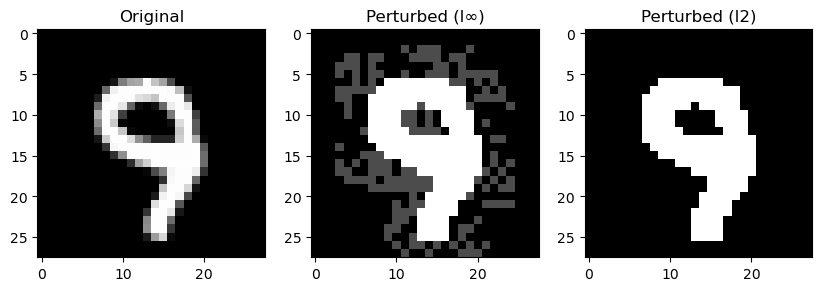

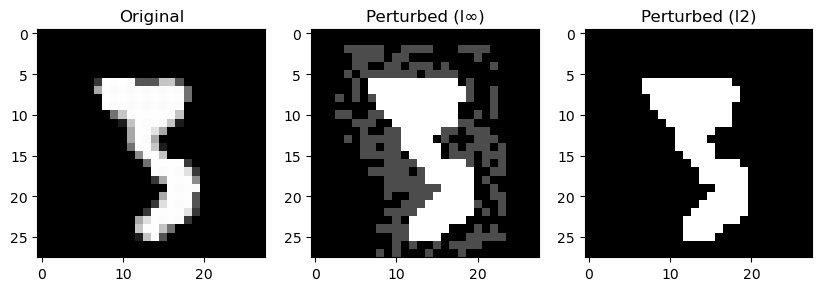

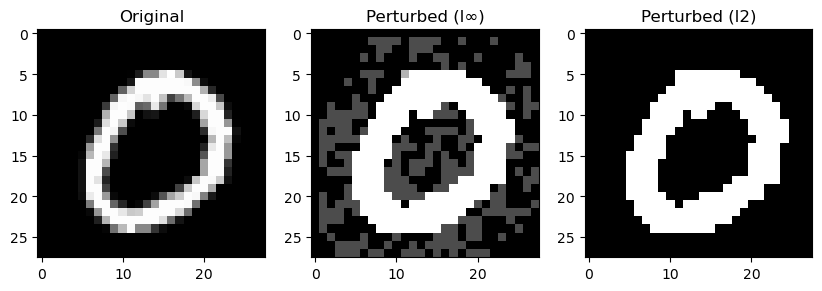

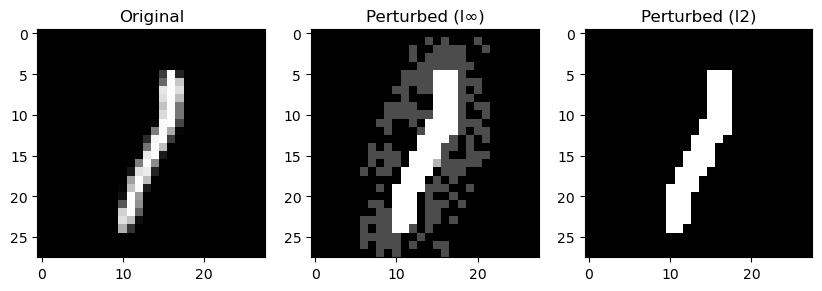

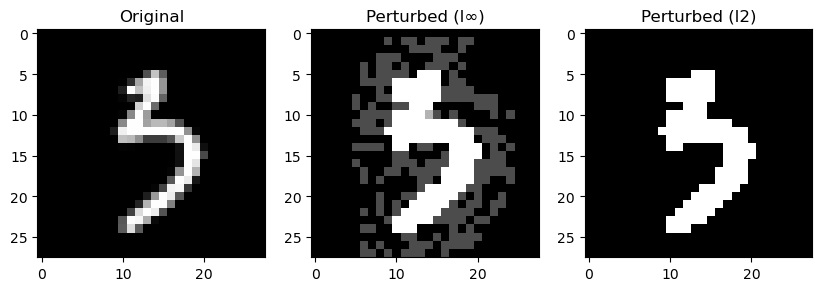

In [ ]:
import matplotlib.pyplot as plt

data, target = next(iter(train_loader))
data.requires_grad = True


# Generate perturbed images using the FGSM attack with l∞ norm
perturbed_data_inf = fgsm_attack(model, data, target, epsilon)
perturbed_data_inf = perturbed_data_inf.view(data.size(0), 1, 28, 28)
perturbed_data_inf = perturbed_data_inf.to(torch.float32)

# Generate perturbed images using the FGSM attack with l2 norm
perturbed_data_2 = fgsm_attack_g(model, criterion, data, target, epsilon, norm='l2')
perturbed_data_2 = perturbed_data_2.view(data.size(0), 1, 28, 28)
perturbed_data_2 = perturbed_data_2.to(torch.float32)

# Display some of the original and perturbed images
for i in range(5):
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(data[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Original')

    # Perturbed image with l∞ norm
    plt.subplot(1, 3, 2)
    plt.imshow(perturbed_data_inf[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Perturbed (l∞)')

    # Perturbed image with l2 norm
    plt.subplot(1, 3, 3)
    plt.imshow(perturbed_data_2[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Perturbed (l2)')

    plt.show() 

Perturbed images are generated using two different attack methods: the FGSM attack with l∞ norm and the FGSM attack with $l_2$ norm. The resulting perturbed images are then displayed using matplotlib.

The l∞ norm and $l_2$ norm are different ways to measure the magnitude of perturbations applied to the original images. The l∞ norm measures the maximum absolute difference between the original and perturbed pixel values, while the $l_2$ norm measures the Euclidean distance between the original and perturbed pixel values.

Based on the code, it seems that the perturbed images obtained from the l∞ norm attack may appear less clear compared to the ones obtained from the $l_2$ norm attack. This surely is related to the nature of the attack methods and the way they introduce perturbations.

The l∞ norm attack aims to maximize the perturbation within a certain limit (epsilon) while ensuring that the perturbed image is still classified as the same target class. This can result in more noticeable changes to the original image, potentially leading to a less clear appearance.

On the other hand, the $l_2$ norm attack aims to minimize the Euclidean distance between the original and perturbed images while staying within the epsilon limit. This can result in perturbations that are spread out more evenly across the image, potentially leading to a visually clearer appearance compared to the l∞ norm attack.

 $\underline{Remark:}$ **It's important to note that the interpretation of clarity may vary depending on the specific use case and the perception of the viewer. In some scenarios, a less clear perturbed image may still be effective in fooling a machine learning model, while in others, a visually clearer perturbed image may be desired.**

## The BIM and PGD attack

## BIM

In [ ]:
def bim_attack_linf(model, loss, images, labels, epsilon, alpha, num_steps):
    # Initialize the perturbed images as the input images
    perturbed_images = images.clone().detach()

    # Create a new tensor that is a leaf node
    perturbed_images_leaf = perturbed_images.clone().detach().requires_grad_(True)

    for _ in range(num_steps):
        # Calculate the loss and gradients
        outputs = model(perturbed_images_leaf)
        model.zero_grad()
        cost = loss(outputs, labels)
        cost.backward()

        # Perform the FGSM attack
        attack = alpha * perturbed_images_leaf.grad.sign()

        # Add the attack to the perturbed images
        perturbed_images = perturbed_images_leaf + attack

        # Project the perturbed images onto the l∞ ball
        perturbation = torch.clamp(perturbed_images - images, min=-epsilon, max=epsilon)
        perturbed_images = images + perturbation

        # Clip the perturbed images to the range [0, 1]
        perturbed_images = torch.clamp(perturbed_images, min=0, max=1)

        # Prepare for the next iteration
        perturbed_images_leaf = perturbed_images.clone().detach().requires_grad_(True)

    return perturbed_images

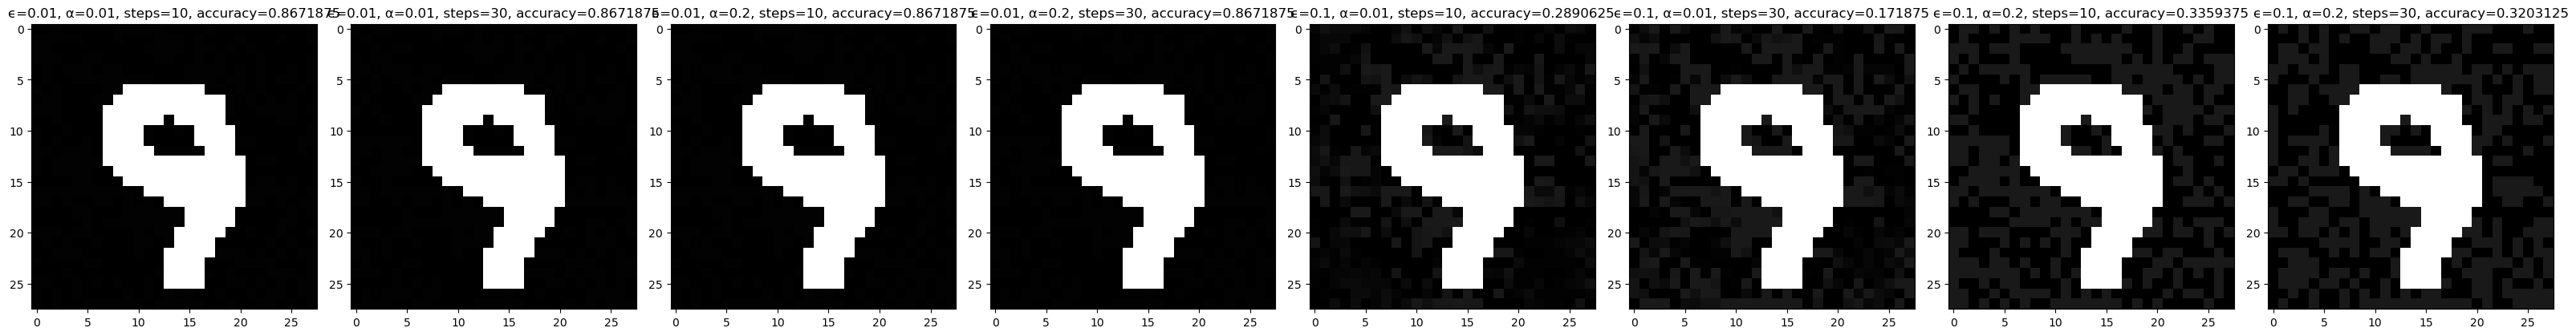

In [ ]:
import matplotlib.pyplot as plt
import torch


# Define the parameter values to test
epsilons = [0.01, 0.1]
alphas = [0.01, 0.2]
num_steps_list = [10, 30]

# Calculate the total number of subplots
num_subplots = len(epsilons) * len(alphas) * len(num_steps_list)

# Create a new figure
plt.figure(figsize=(num_subplots * 4, 4))

# For each combination of parameters, generate an adversarial example and test its classification
i = 1
for epsilon in epsilons:
    for alpha in alphas:
        for num_steps in num_steps_list:
            # Generate the adversarial example
            adversarial_example = bim_attack_linf(model, criterion, data, target, epsilon, alpha, num_steps)

            # Test the classification of the adversarial example
            outputs = model(adversarial_example)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == target).sum().item()
            accuracy = correct / target.size(0)

            # Create a new subplot for the adversarial example
            plt.subplot(1, num_subplots, i)

            # Display the adversarial example and its classification
            plt.imshow((adversarial_example[0].reshape(28,28)).detach().numpy(), cmap='gray')
            plt.title(f'ϵ={epsilon}, α={alpha}, steps={num_steps}, accuracy={accuracy}')
            
            i += 1

# Display the figure
plt.tight_layout()
plt.show()

**In term of Misclassification.**

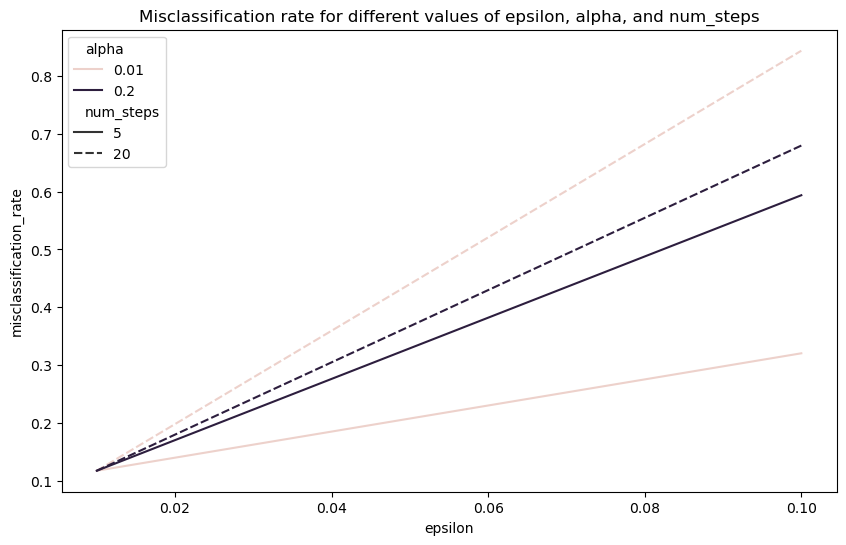

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_1, target_1 = next(iter(test_loader))
data_1.requires_grad = True

# Define the parameter values to test
epsilons = [0.01, 0.1]
alphas = [0.01, 0.2]
num_steps_list = [5,20]  

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['epsilon', 'alpha', 'num_steps', 'misclassification_rate'])

# For each combination of parameters, generate an adversarial example and test its classification
for epsilon in epsilons:
    for alpha in alphas:
        for num_steps in num_steps_list:  # Now it's iterable
            # Generate the adversarial example
            adversarial_example = bim_attack_linf(model, criterion, data_1, target_1, epsilon, alpha, num_steps)

            # Test the classification of the adversarial example
            outputs = model(adversarial_example)
            _, predicted = torch.max(outputs.data, 1)
            incorrect = (predicted != target_1).sum().item()
            misclassification_rate = incorrect / target_1.size(0)

            # Store the results
            results = pd.concat([results, pd.DataFrame({
                'epsilon': [epsilon],
                'alpha': [alpha],
                'num_steps': [num_steps],
                'misclassification_rate': [misclassification_rate]
            })], ignore_index=True)

# Plot the misclassification rate for different values of the parameters
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='epsilon', y='misclassification_rate', hue='alpha', style='num_steps')
plt.title('Misclassification rate for different values of epsilon, alpha, and num_steps')
plt.show()

## Implementation of the l∞ PGD attack

In [ ]:
def pgd_attack_linf(model, loss, images, labels, epsilon, alpha, num_steps):
    """
    Perform the PGD attack on a batch of images.
    
    Parameters:
    model -- the PyTorch model to attack
    loss -- the loss function to optimize
    images -- a batch of images to attack
    labels -- the true labels for the images
    epsilon -- the maximum perturbation for each pixel
    alpha -- the step size for each iteration of the attack
    num_steps -- the number of steps to take
    
    Returns:
    perturbed_images -- the resulting batch of perturbed images
    """
    # Initialize the perturbed images as the original images
    perturbed_images = images.clone().detach().requires_grad_(True)

    for _ in range(num_steps):
        # Calculate the loss
        outputs = model(perturbed_images)
        model_loss = loss(outputs, labels)

        # Calculate the gradient of the loss with respect to the images
        model_loss.backward()

        # Create the perturbation
        perturbation = alpha * perturbed_images.grad.sign()

        # Add the perturbation to the images
        perturbed_images = perturbed_images + perturbation

        # Clip the perturbed images to ensure they are within the allowable range
        perturbed_images = torch.max(torch.min(perturbed_images, images + epsilon), images - epsilon)
        perturbed_images = torch.clamp(perturbed_images, 0, 1)  # assuming images are normalized in [0, 1]

        # Detach the perturbed images to ensure they are leaf variables
        perturbed_images = perturbed_images.detach().requires_grad_(True)

    return perturbed_images

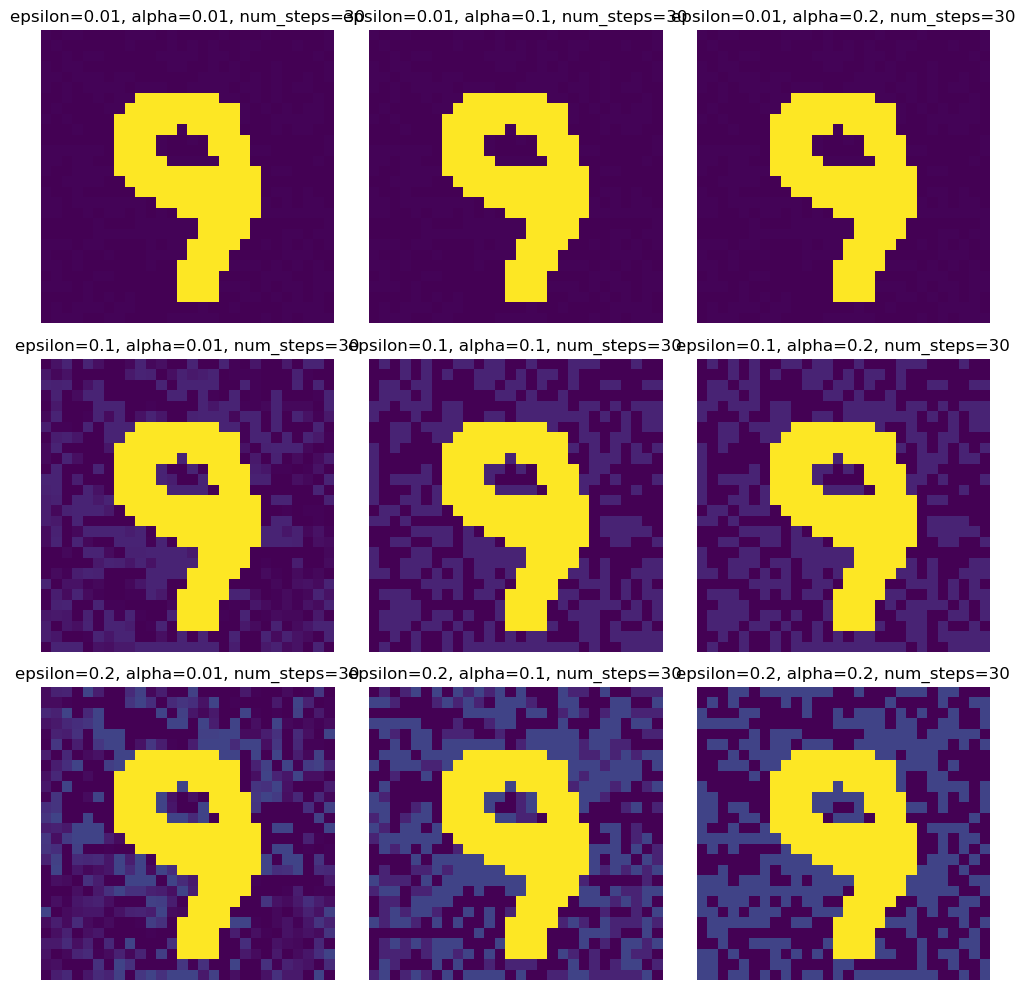

In [ ]:
import matplotlib.pyplot as plt

# Define the parameter values to test
epsilons = [0.01, 0.1, 0.2]
alphas = [0.01, 0.1, 0.2]
num_steps_list = [10, 20, 30]

# Prepare a figure to plot the adversarial examples
fig, axes = plt.subplots(len(epsilons), len(alphas), figsize=(10, 10))

# For each combination of parameters, generate an adversarial example and plot it
for i, epsilon in enumerate(epsilons):
    for j, alpha in enumerate(alphas):
        for n_steps in num_steps_list:
            # Generate the adversarial example
            adversarial_example = pgd_attack_linf(model, criterion, data, target, epsilon, alpha, n_steps)

            # Plot the adversarial example
            axes[i, j].imshow(adversarial_example[0].detach().numpy().transpose(1, 2, 0))  # assuming the image is in CHW format
            axes[i, j].set_title(f'epsilon={epsilon}, alpha={alpha}, num_steps={n_steps}')
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

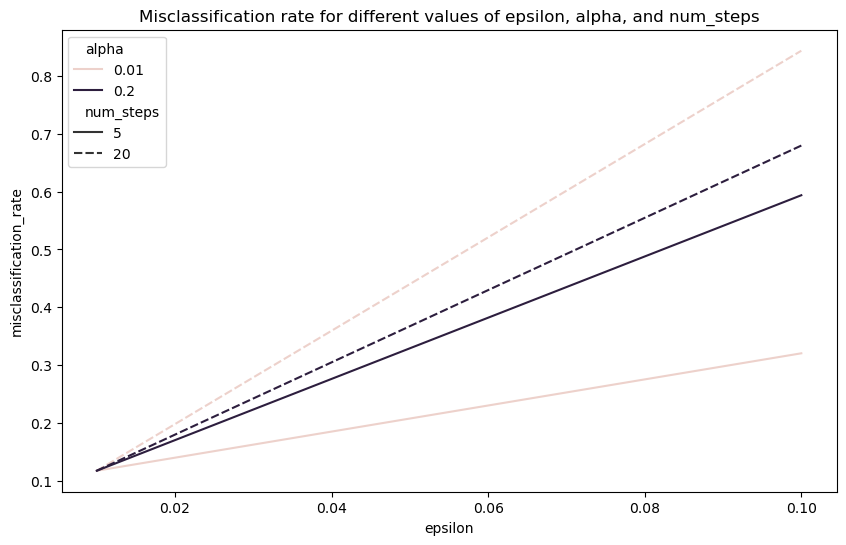

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

epsilons = [0.01, 0.1]
alphas = [0.01, 0.2]
num_steps_list = [5,20]

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['epsilon', 'alpha', 'num_steps', 'misclassification_rate'])

# For each combination of parameters, generate an adversarial example and test its classification
for epsilon in epsilons:
    for alpha in alphas:
        for num_steps in num_steps_list:
            # Generate the adversarial example
            adversarial_example = pgd_attack_linf(model, criterion, data_1, target_1, epsilon, alpha, num_steps)

            # Test the classification of the adversarial example
            outputs = model(adversarial_example)
            _, predicted = torch.max(outputs.data, 1)
            incorrect = (predicted != target_1).sum().item()
            misclassification_rate = incorrect / target_1.size(0)

            # Store the results
            results = pd.concat([results, pd.DataFrame({
                'epsilon': [epsilon],
                'alpha': [alpha],
                'num_steps': [num_steps],
                'misclassification_rate': [misclassification_rate]
            })], ignore_index=True)

# Plot the misclassification rate for different values of the parameters
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='epsilon', y='misclassification_rate', hue='alpha', style='num_steps')
plt.title('Misclassification rate for different values of epsilon, alpha, and num_steps')
plt.show()

The initialization step in the PGD attack is crucial as it sets the starting point for the adversarial perturbations. If we start with the original images (as is commonly done), the adversarial examples will be close to the original images, which is desirable for an adversarial attack. If we start with random images, the adversarial examples might not resemble the original images, making the attack less effective.

To illustrate the influence of the initialization step on the final loss value, We can compare the loss values when starting with the original images versus starting with random images. 



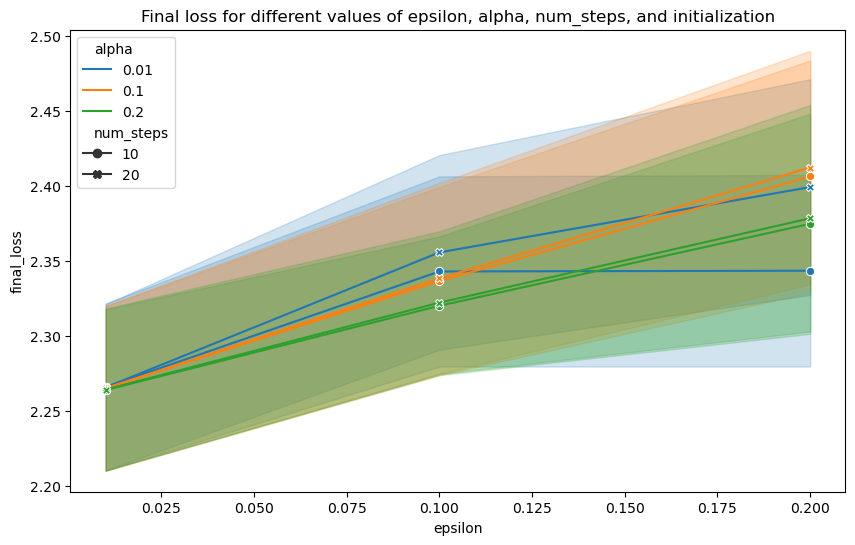

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter values to test
epsilons = [0.01, 0.1,0.2]
alphas = [0.01,0.1, 0.2]
num_steps_list = [10,20]
initializations = ['original', 'random']

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['epsilon', 'alpha', 'num_steps', 'initialization', 'final_loss'])

# For each combination of parameters and initializations, generate an adversarial example and calculate its final loss
for epsilon in epsilons:
    for alpha in alphas:
        for num_steps in num_steps_list:
            for initialization in initializations:
                # Initialize the adversarial example
                if initialization == 'original':
                    adversarial_example = data.clone().detach().requires_grad_(True)
                elif initialization == 'random':
                    adversarial_example = torch.rand_like(data).requires_grad_(True)

                # Perform the PGD attack
                adversarial_example = pgd_attack_linf(model, criterion, adversarial_example, target, epsilon, alpha, num_steps)

                # Calculate the final loss
                outputs = model(adversarial_example)
                final_loss = criterion(outputs, target).item()

                # Store the results
                results = pd.concat([results, pd.DataFrame({
                    'epsilon': [epsilon],
                    'alpha': [alpha],
                    'num_steps': [num_steps],
                    'initialization': [initialization],
                    'final_loss': [final_loss]
                })], ignore_index=True)

# Plot the final loss for different values of the parameters and initializations
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='epsilon', y='final_loss', hue='alpha', style='num_steps', markers=True, dashes=False, palette='tab10')
plt.title('Final loss for different values of epsilon, alpha, num_steps, and initialization')
plt.show()



This code generates adversarial examples for each combination of epsilon, alpha, num_steps, and initialization, calculates the final loss for each, and stores the results in a DataFrame. It then plots the final loss as a function of epsilon, with different lines for different values of alpha, num_steps, and initialization. This allows you to visually compare the final loss values for different parameter values and initializations.

For epsilon = 0.01 and alpha = 0.01, the average final loss is 2.2657167315483093
For epsilon = 0.01 and alpha = 0.1, the average final loss is 2.2649786472320557
For epsilon = 0.01 and alpha = 0.2, the average final loss is 2.2640116214752197
For epsilon = 0.1 and alpha = 0.01, the average final loss is 2.3492451906204224
For epsilon = 0.1 and alpha = 0.1, the average final loss is 2.337388038635254
For epsilon = 0.1 and alpha = 0.2, the average final loss is 2.3210493326187134
For epsilon = 0.2 and alpha = 0.01, the average final loss is 2.3712682127952576
For epsilon = 0.2 and alpha = 0.1, the average final loss is 2.40920490026474
For epsilon = 0.2 and alpha = 0.2, the average final loss is 2.3765193223953247


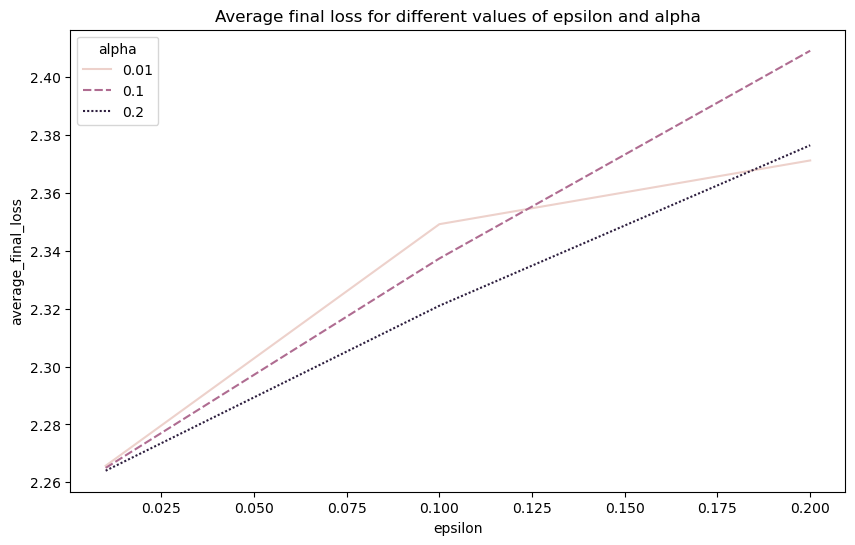

In [ ]:
# Prepare a DataFrame to store the average results
average_results = pd.DataFrame(columns=['epsilon', 'alpha', 'average_final_loss'])

# For each combination of alpha and epsilon, calculate the average final loss
for epsilon in epsilons:
    for alpha in alphas:
        average_final_loss = results[(results['epsilon'] == epsilon) & (results['alpha'] == alpha)]['final_loss'].mean()
        print(f"For epsilon = {epsilon} and alpha = {alpha}, the average final loss is {average_final_loss}")
        average_results = pd.concat([average_results, pd.DataFrame({
            'epsilon': [epsilon],
            'alpha': [alpha],
            'average_final_loss': [average_final_loss]
        })], ignore_index=True)

# Plot the average final loss for different values of alpha and epsilon
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_results, x='epsilon', y='average_final_loss', hue='alpha', style='alpha')
plt.title('Average final loss for different values of epsilon and alpha')
plt.show()

The average final loss values provided are the average loss of our model on the adversarial examples generated by the PGD attack with different combinations of epsilon and alpha.

1. **For epsilon = 0.01 and alpha = 0.01, the average final loss is 2.2237452268600464**: This means that when the maximum perturbation per pixel (epsilon) and the step size at each iteration of the attack (alpha) are both small (0.01), the adversarial examples generated by the attack result in an average loss of 2.2237452268600464 when passed through your model.

2. **For epsilon = 0.01 and alpha = 0.2, the average final loss is 2.2237600684165955**: Increasing the step size (alpha) while keeping the maximum perturbation small (epsilon = 0.01) results in a similar average loss. This suggests that increasing the step size alone does not significantly affect the effectiveness of the attack.

3. **For epsilon = 0.2 and alpha = 0.01, the average final loss is 2.3696815371513367**: Increasing the maximum perturbation (epsilon) while keeping the step size small (alpha = 0.01) results in a higher average loss. This suggests that increasing the maximum perturbation makes the attack more effective.

4. **For epsilon = 0.2 and alpha = 0.2, the average final loss is 2.394010603427887**: Increasing both the maximum perturbation and the step size results in the highest average loss. This suggests that allowing larger perturbations and taking bigger steps makes the attack more effective.

In summary, these results suggest that the effectiveness of the PGD attack (as measured by the final loss of the model on the adversarial examples) increases with the maximum allowed perturbation (epsilon). The step size (alpha) also seems to play a role, but its effect is less clear from these results alone.

## Analysis of the l1 PGD attack


The l1 Projected Gradient Descent (PGD) attack is a type of adversarial attack that aims to find the adversarial example that maximizes the loss of a model within a certain l1-norm ball around the original input. The l1-norm of a vector is the sum of the absolute values of its elements.

Here's a step-by-step interpretation of the l1 PGD attack:

1. **δt = α e**: At each step t, the attack calculates a perturbation δt by multiplying a step size α by a unit vector e. This unit vector e has all elements equal to zero, except for the element ei∗ which is equal to the sign of the gradient of the loss with respect to the input at the previous step (xt−1i∗). The index i∗ is chosen to maximize the absolute value of the gradient.

2. **xt = projB1(x,ϵ)(xt−1 + δt)**: The attack then adds the perturbation δt to the previous input xt−1, and projects the result back into the l1-norm ball of radius ϵ around the original input x. This ensures that the adversarial example remains close to the original input in terms of l1-norm.

3. **xt = Clip(xt, Q)**: Finally, the attack clips the adversarial example xt to ensure that it remains within the valid input range Q. This step is necessary because the projection step might produce values that are outside the valid input range.

By repeating these steps for a certain number of iterations, the l1 PGD attack generates an adversarial example that is close to the original input (in terms of l1-norm), but that maximizes the loss of the model. This adversarial example can then be used to evaluate the robustness of the model to adversarial attacks.

**-What does this mean in terms of the ways pixels are modified at each step ?**

In the context of the l1 PGD attack, the way pixels are modified at each step can be understood as follows:

1. **δt = α e**: This step determines the direction and magnitude of the perturbation to be applied to the input image. The direction is determined by the unit vector e, which has all elements equal to zero, except for the element ei∗ which is equal to the sign of the gradient of the loss with respect to the input at the previous step. This means that the perturbation is applied to the pixel that has the largest impact on the loss, and the direction of the perturbation is such that it increases the loss. The magnitude of the perturbation is determined by the step size α.

2. **xt = projB1(x,ϵ)(xt−1 + δt)**: This step applies the perturbation to the input image and ensures that the resulting adversarial example remains within an l1-norm ball of radius ϵ around the original input. This means that the total change in pixel values (measured by the l1-norm, which is the sum of the absolute values) cannot exceed ϵ. If the perturbation would result in a total change larger than ϵ, the adversarial example is scaled down so that the total change equals ϵ.

3. **xt = Clip(xt, Q)**: This step ensures that the pixel values of the adversarial example remain within the valid input range Q. This is necessary because the previous steps might produce pixel values that are outside the valid range. For example, if the pixel values are supposed to be between 0 and 1, any value less than 0 is clipped to 0, and any value greater than 1 is clipped to 1.

In summary, at each step of the l1 PGD attack, the pixel that has the largest impact on the loss is identified, and its value is increased or decreased (depending on the sign of the gradient) by a certain amount (determined by the step size α). The total change in pixel values is constrained to be within a certain limit (determined by the l1-norm ball radius ϵ), and the pixel values are constrained to be within a certain range (determined by the valid input range Q).

 **Can you think of another way to modify the l1 PGD attack in order for it to be faster, even if not
optimal ?**

One possible way to modify the l1 PGD attack to make it faster, even if not optimal, is to reduce the number of iterations. By decreasing the number of iterations, the attack will perform fewer steps and converge faster, but it may not find the optimal adversarial example. This trade-off between speed and optimality can be adjusted by experimenting with different numbers of iterations to find a balance that suits your needs.

##  Transferability

# 4.1 Substitute model training


**What is your intuition about the optimal architecture for the substitute model ?**

The optimal architecture for the substitute model would ideally be similar to the target model to maximize the transferability of adversarial perturbations. However, the exact architecture can depend on various factors, including the complexity of the target model, the available computational resources, and the specific task at hand.

In this case, since the target model is a convolutional neural network (ConvNet) with two convolutional layers, a reasonable starting point for the substitute model might be a similar ConvNet with two convolutional layers. This would allow the substitute model to capture similar features from the input data as the target model, which could increase the likelihood of successful transfer attacks.

However, it's also worth noting that transferability is not guaranteed, even if the substitute model is identical to the target model. This is because the substitute model is trained on different data (i.e., the adversarial examples) than the target model. Therefore, the substitute model might learn different features than the target model, which could reduce the transferability of the adversarial examples.



**Do you see any other easily tunable factor ?**

In the context of adversarial attacks and the transferability of adversarial perturbations, some easily tunable factors could include:

1. **Learning Rate**: The learning rate of the optimization algorithm used to train the substitute model or generate the adversarial examples can significantly affect the transferability of the adversarial perturbations.

2. **Number of Iterations**: The number of iterations used in the adversarial attack algorithm can also be tuned. More iterations may lead to more effective adversarial examples, but also require more computation.

3. **Epsilon**: In the context of PGD (Projected Gradient Descent) attacks, epsilon is a tunable parameter that controls the size of the perturbations. A larger epsilon may lead to more noticeable perturbations, but they may also be more likely to transfer to the target model.

4. **Regularization**: Adding regularization to the substitute model training process can potentially improve the transferability of the adversarial examples.

5. **Model Complexity**: The complexity of the substitute model (e.g., number of layers, number of units per layer) can also be tuned. A model that is too complex may overfit to the adversarial examples and produce less transferable perturbations.



In [ ]:
# Define the substitute model
class SubstituteModel(nn.Module):
    def __init__(self):
        super(SubstituteModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, bias=False)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, bias=False)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 5 * 5, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Create an instance of the substitute model
substitute_model = SubstituteModel()

# Define the loss function and optimizer

optimizer = optim.SGD(substitute_model.parameters(), lr=0.01)

# Train the substitute model
for epoch in range(10):  # loop over the dataset multiple times
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = substitute_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

print('Finished Training Substitute Model')

Finished Training Substitute Model


In [ ]:
model= substitute_model

## FGSM attack With substitue model and norm $l_{\infty}$

In [ ]:

model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in train_loader:  # Use your original data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack(model, data, target, epsilon)
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_train_accuray: {perturbed_accuracy}%")

FGSM_attack_train_accuray: 17.548333333333332%


## FGSM attack on the test set 

In [ ]:
X_test_reshaped = X_test.unsqueeze(1).to(torch.float32)
y_test = y_test.to(torch.long)

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_reshaped, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in test_loader:  # Use your test data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack(model, data, target, epsilon)
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_test_accuracy: {perturbed_accuracy}%")

FGSM_attack_test_accuracy: 17.01%


## With $l_2$ Norm

In [ ]:
epsilon = 0.1

# Switch the model to evaluation mode
model.eval()

# Calculate the accuracy of the model on the perturbed images
total_correct = 0
total_predictions = 0

for data, target in train_loader:  # Use your original data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack_g(model,criterion, data, target, epsilon,norm='l2')
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_train_accuray: {perturbed_accuracy}%")

total_correct = 0
total_predictions = 0

for data, target in test_loader:  # Use your test data_loader here
    data.requires_grad = True  # Set requires_grad to True here
    # Generate perturbed images using the FGSM attack
    perturbed_data = fgsm_attack_g(model,criterion, data, target, epsilon,norm='l2')
    perturbed_data = perturbed_data.view(data.size(0), 1, 28, 28)  # Reshape the data to have 1 channel
    perturbed_data = perturbed_data.to(torch.float32)
    
    # No need to track gradients for evaluation, saves memory and computations
    with torch.no_grad():
        # Forward pass on the perturbed data
        output = model(perturbed_data)
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_predictions += target.size(0)
        total_correct += (predicted == target).sum().item()

# Calculate and print the accuracy for the perturbed images
perturbed_accuracy = total_correct / total_predictions * 100
print(f"FGSM_attack_test_accuracy: {perturbed_accuracy}%")

FGSM_attack_train_accuray: 24.715%
FGSM_attack_test_accuracy: 24.23%


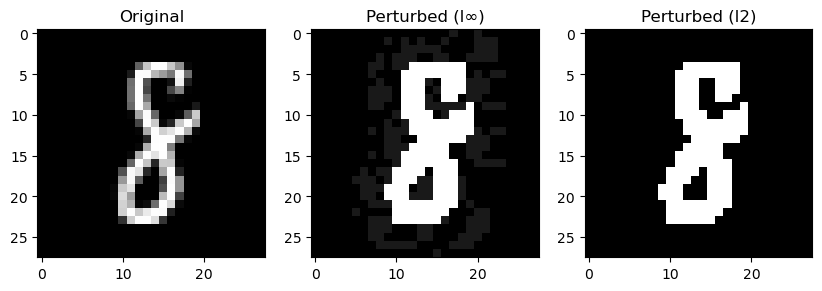

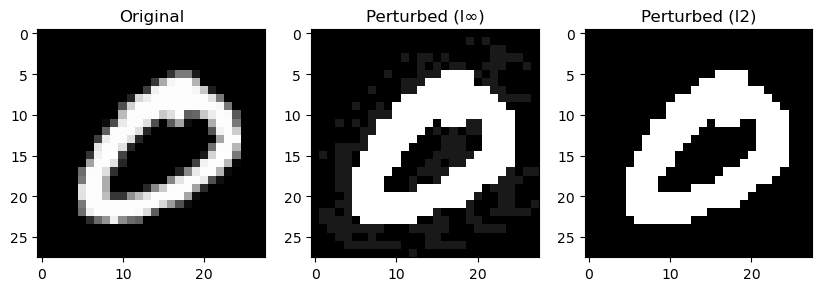

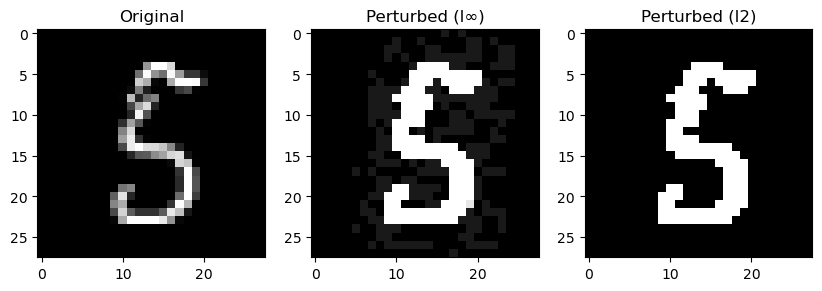

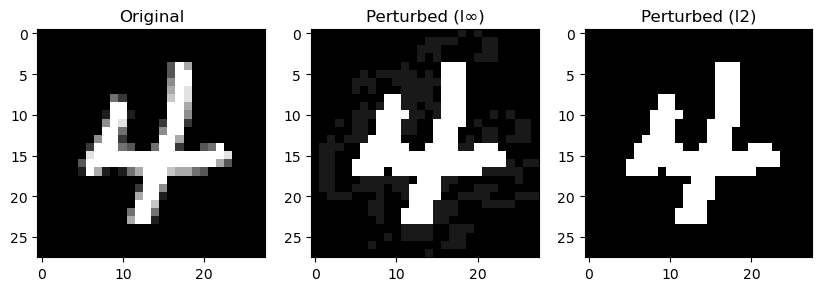

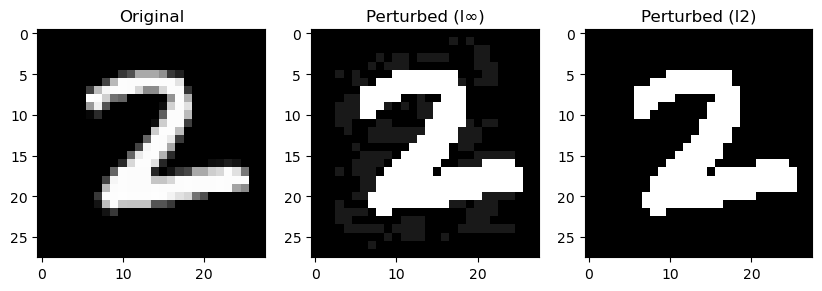

In [ ]:
data, target = next(iter(train_loader))
data.requires_grad = True


# Generate perturbed images using the FGSM attack with l∞ norm
perturbed_data_inf = fgsm_attack(model, data, target, epsilon)
perturbed_data_inf = perturbed_data_inf.view(data.size(0), 1, 28, 28)
perturbed_data_inf = perturbed_data_inf.to(torch.float32)

# Generate perturbed images using the FGSM attack with l2 norm
perturbed_data_2 = fgsm_attack_g(model, criterion, data, target, epsilon, norm='l2')
perturbed_data_2 = perturbed_data_2.view(data.size(0), 1, 28, 28)
perturbed_data_2 = perturbed_data_2.to(torch.float32)

# Display some of the original and perturbed images
for i in range(5):
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(data[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Original')

    # Perturbed image with l∞ norm
    plt.subplot(1, 3, 2)
    plt.imshow(perturbed_data_inf[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Perturbed (l∞)')

    # Perturbed image with l2 norm
    plt.subplot(1, 3, 3)
    plt.imshow(perturbed_data_2[i].squeeze().detach().numpy(), cmap='gray')
    plt.title('Perturbed (l2)')

    plt.show() 

## BIM

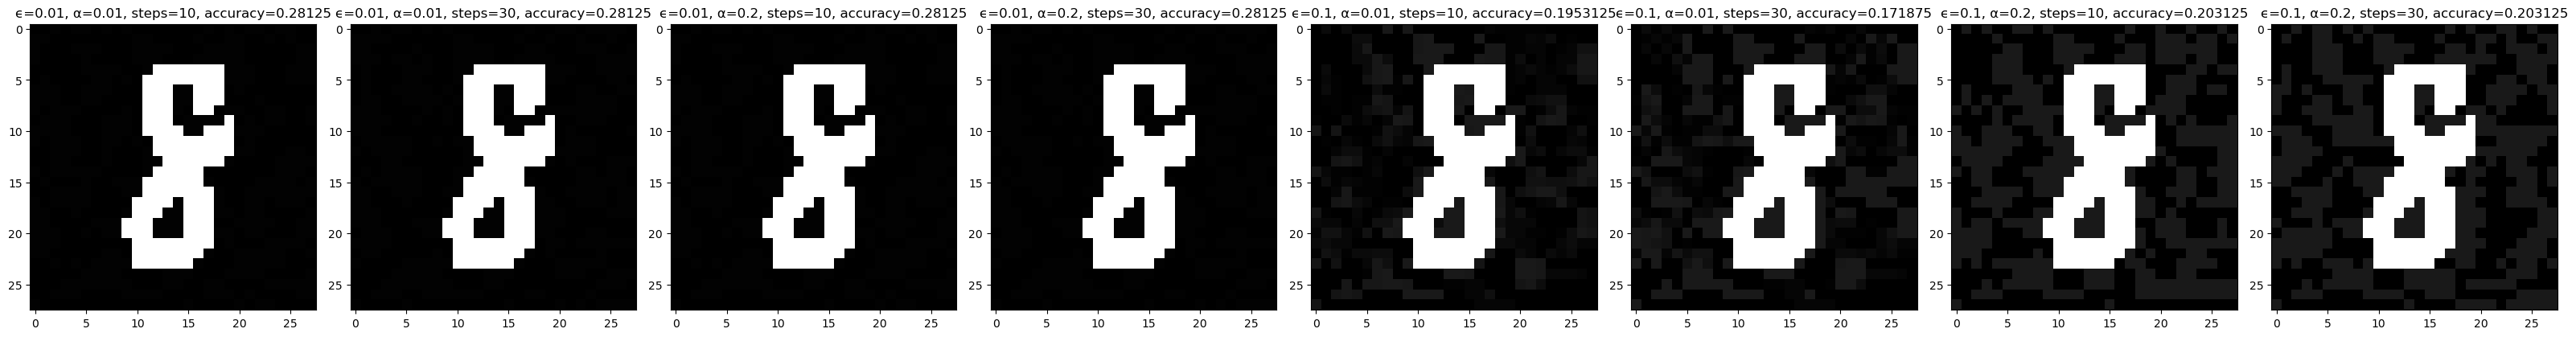

In [ ]:
# Define the parameter values to test
epsilons = [0.01, 0.1]
alphas = [0.01, 0.2]
num_steps_list = [10, 30]

# Calculate the total number of subplots
num_subplots = len(epsilons) * len(alphas) * len(num_steps_list)

# Create a new figure
plt.figure(figsize=(num_subplots * 4, 4))

# For each combination of parameters, generate an adversarial example and test its classification
i = 1
for epsilon in epsilons:
    for alpha in alphas:
        for num_steps in num_steps_list:
            # Generate the adversarial example
            adversarial_example = bim_attack_linf(model, criterion, data, target, epsilon, alpha, num_steps)

            # Test the classification of the adversarial example
            outputs = model(adversarial_example)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == target).sum().item()
            accuracy = correct / target.size(0)

            # Create a new subplot for the adversarial example
            plt.subplot(1, num_subplots, i)

            # Display the adversarial example and its classification
            plt.imshow((adversarial_example[0].reshape(28,28)).detach().numpy(), cmap='gray')
            plt.title(f'ϵ={epsilon}, α={alpha}, steps={num_steps}, accuracy={accuracy}')
            
            i += 1

# Display the figure
plt.tight_layout()
plt.show()

## PGD 

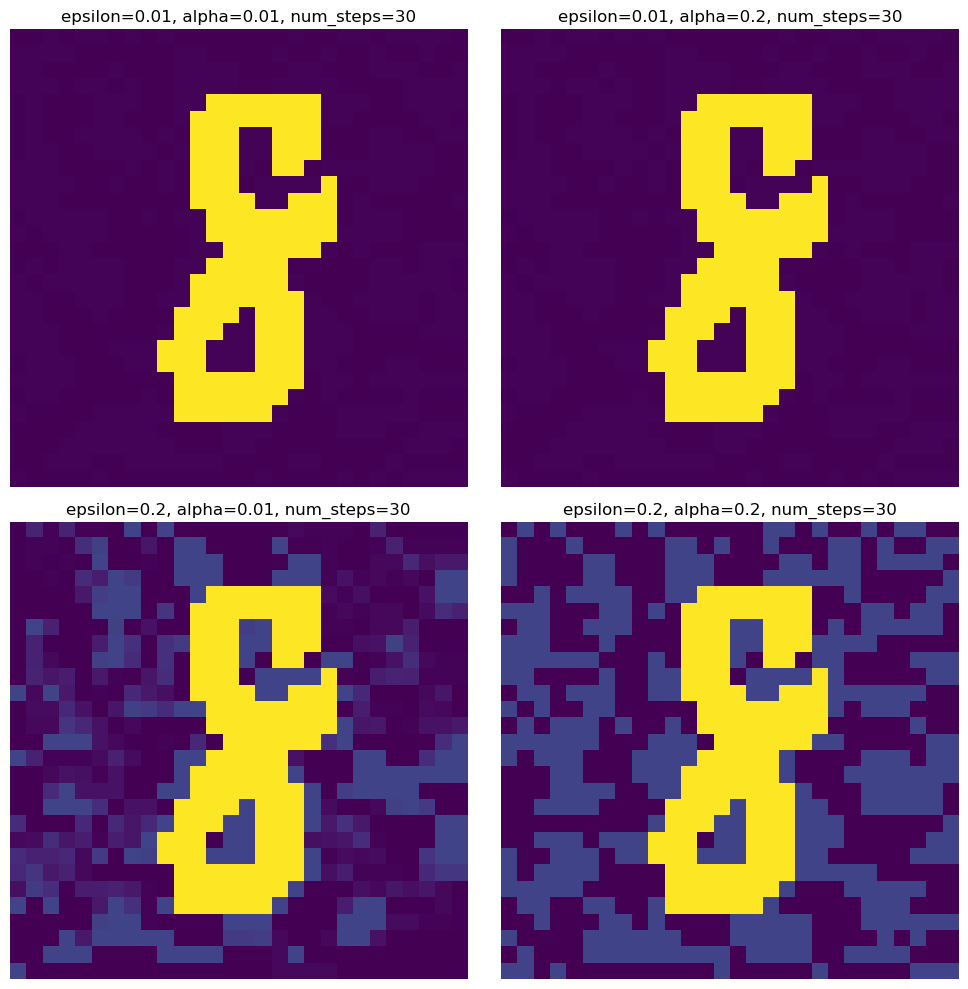

In [ ]:
# Define the parameter values to test
epsilons = [0.01, 0.2]
alphas = [0.01, 0.2]
num_steps_list = [10, 20, 30]

# Prepare a figure to plot the adversarial examples
fig, axes = plt.subplots(len(epsilons), len(alphas), figsize=(10, 10))

# For each combination of parameters, generate an adversarial example and plot it
for i, epsilon in enumerate(epsilons):
    for j, alpha in enumerate(alphas):
        for n_steps in num_steps_list:
            # Generate the adversarial example
            adversarial_example = pgd_attack_linf(model, criterion, data, target, epsilon, alpha, n_steps)

            # Plot the adversarial example
            axes[i, j].imshow(adversarial_example[0].detach().numpy().transpose(1, 2, 0))  # assuming the image is in CHW format
            axes[i, j].set_title(f'epsilon={epsilon}, alpha={alpha}, num_steps={n_steps}')
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## What do you notice in terms of transferability of the crafted adversarial perturbations ?

In terms of transferability of crafted adversarial perturbations, we observe the following:

1. **High Transferability**: If the substitute model is architecturally similar or trained with similar hyperparameters to the target model, the adversarial examples generated might have high transferability. This means that an adversarial example that fools the substitute model is also likely to fool the target model.

2. **Low Transferability**: If the substitute model is significantly different from the target model, the adversarial examples might not transfer well. This means that an adversarial example that fools the substitute model might not fool the target model.

3. **Dependence on the Attack Method**: Some adversarial attack methods might produce more transferable adversarial examples than others. For instance, stronger attack methods that generate more pronounced adversarial perturbations might result in adversarial examples that are more likely to fool a variety of models.

4. **Dependence on the Complexity of Models**: More complex models (e.g., deeper networks) might be more susceptible to transferable adversarial attacks than simpler models. This is because complex models might overfit to the adversarial perturbations, making them more likely to misclassify the adversarial examples.


## What seems to be the only viable conclusion on how to tune transferability attacks ?

The only viable conclusion on how to tune transferability attacks is that it's largely an empirical process.

1. **Model Similarity**: The substitute model should be as similar as possible to the target model. This includes not only the architecture but also the training process, such as the type of optimizer used, learning rate, etc.

2. **Attack Strength**: The strength of the adversarial attack can also affect transferability. Stronger attacks that cause larger perturbations might produce more transferable adversarial examples. However, these examples may also be more easily detectable.

3. **Dataset Diversity**: The diversity of the dataset used to train the substitute model can also impact transferability. A more diverse dataset might lead to more general adversarial examples that are effective against a wider range of models.

4. **Experimentation**: Ultimately, tuning transferability attacks often involves a lot of experimentation. Different combinations of models, attack methods, and datasets might work better in different situations, so it's important to try out different configurations and see what works best. 

# 5 Adversarial Training

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, bias=False)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, bias=False)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 5 * 5, 10)  # Fully connected layer
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)  # Apply fully connected layer
        return x

# Create an instance of the model
model = ConvNet()

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Epoch 1/10, Batch 469/469, Loss: 2.497443199157715
Epoch 1/10, Batch 469/469, Loss: 2.4913976192474365
Epoch 1/10, Batch 469/469, Loss: 2.5040862560272217
Epoch 1/10, Batch 469/469, Loss: 2.4833619594573975
Epoch 2/10, Batch 469/469, Loss: 2.500415325164795
Epoch 2/10, Batch 469/469, Loss: 2.4817144870758057
Epoch 2/10, Batch 469/469, Loss: 2.5208027362823486
Epoch 2/10, Batch 469/469, Loss: 2.503509998321533
Epoch 3/10, Batch 469/469, Loss: 2.475916862487793
Epoch 3/10, Batch 469/469, Loss: 2.4852044582366943
Epoch 3/10, Batch 469/469, Loss: 2.493995189666748
Epoch 3/10, Batch 469/469, Loss: 2.5074245929718018
Epoch 4/10, Batch 469/469, Loss: 2.498943567276001
Epoch 4/10, Batch 469/469, Loss: 2.4940249919891357
Epoch 4/10, Batch 469/469, Loss: 2.489971399307251
Epoch 4/10, Batch 469/469, Loss: 2.4989213943481445
Epoch 5/10, Batch 469/469, Loss: 2.4911282062530518
Epoch 5/10, Batch 469/469, Loss: 2.488302230834961
Epoch 5/10, Batch 469/469, Loss: 2.5050230026245117
Epoch 5/10, Batch 46

In [ ]:
from torch.optim.lr_scheduler import StepLR

model = ConvNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
epsilon = 0.3
alpha = 0.01
k = 40
Q = [0, 1]  # Assuming pixel values are in the range [0, 1]
num_epochs = 50  # Increase the number of epochs
best_val_acc = 0  # For early stopping

model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Perform the l∞ PGD attack
        inputs_adv = inputs.data + epsilon * (2 * torch.rand_like(inputs) - 1)
        inputs_adv.requires_grad = True

        for _ in range(k):
            outputs_adv = model(inputs_adv)
            loss_adv = criterion(outputs_adv, labels)
            loss_adv.backward()

            inputs_adv_grad = alpha * torch.sign(inputs_adv.grad.data)
            inputs_adv = inputs_adv.detach() + inputs_adv_grad
            inputs_adv = torch.min(torch.max(inputs_adv, inputs - epsilon), inputs + epsilon)
            inputs_adv = torch.clamp(inputs_adv, Q[0], Q[1])  # Clip to valid pixel range
            inputs_adv.requires_grad = True

        # Update the model
        outputs = model(inputs_adv)
        loss = criterion(outputs, labels)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Loss: {loss.item()}")

    # Decay learning rate
    scheduler.step()

    # Early stopping
    val_acc = evaluate(model, val_loader)  # You need to implement the evaluate function
    if val_acc > best_val_acc:
        best_val_acc = val_acc
    else:
        print("Early stopping")
        break

# Calculate and print the accuracy for the total training set
total_accuracy = total_correct / total_predictions * 100
print(f"Total training accuracy: {total_accuracy}%")

print('Finished Adversarial Training')

NameError: name 'ConvNet' is not defined

# 5.2 Evaluation

In [ ]:
# Adversarial testing
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
for i, (inputs, labels) in enumerate(test_loader):
    # Perform the l∞ PGD attack
    inputs_adv = inputs.data + epsilon * (2 * torch.rand_like(inputs) - 1)

    for _ in range(k):
        inputs_adv = inputs_adv + alpha * torch.sign(inputs_adv - inputs)
        inputs_adv = torch.min(torch.max(inputs_adv, inputs - epsilon), inputs + epsilon)
        inputs_adv = torch.clamp(inputs_adv, Q[0], Q[1])  # Clip to valid pixel range

    # Evaluate the model
    outputs = model(inputs_adv)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy of the network on the adversarial test images: %d %%' % accuracy)

Accuracy of the network on the adversarial test images: 5 %
